In [38]:
from dataclasses import dataclass
import json
import dpath
from typing import List, Dict
import pandas as pd
import math

@dataclass
class Token:
    rectangle: list
    text: str
    confidence: float

    @property
    def left(self) -> float:
        return self.rectangle[0]
    
    @property
    def top(self) -> float:
        return 1-self.rectangle[1]

    @property
    def right(self) -> float:
        return self.rectangle[2]
    
    @property
    def bottom(self) -> float:
        return 1-self.rectangle[3]
    
    @property
    def height(self) -> float:
        return abs(self.top-self.bottom)
    
    @property
    def length(self) -> float:
        return abs(self.right-self.left)

    def __repr__(self):
        return f'Y:{self.top:.3f} X:{self.left:.3f} ---- "{self.text}" ({self.confidence:.02f})'

@dataclass
class Tokens:
    
    def __init__(self, tokens: list) -> None:
        self.tokens=tokens

    truncate = 3
    epsilon = 0.009

    def __iter__(self):
        self.index = 0
        return self

    def __next__(self):
        if self.index >= len(self.tokens):
            raise StopIteration
        value = self.tokens[self.index]
        self.index += 1
        return value

    def __len__(self):
        return len(self.tokens)
    
    def __getitem__(self, index):
        return self.tokens[index]

    def __repr__(self):
        return '\n'.join(str(token) for token in self.tokens)

    @property
    def sorted_tokens(self) -> list:
        return sorted(
            self.tokens,
            key=lambda token: (token.top, -token.left),
            reverse=True,
        )

    def truncate_values(self, values: list, truncate: int):
        return [round(value, truncate) for value in values]

    def get_all_values(self, attribute: str):
        assert attribute in ['top', 'left', 'right', 'bottom'], 'Invalid attribute name'
        return [getattr(token, attribute) for token in self.tokens]
        # return self.truncate_values(
        #     values=(getattr(token, attribute) for token in self.tokens), 
        #     truncate=self.truncate
        #     )
    
    @property
    def lines(self):
        new_line, lines = [], []
        prev_y = 10
        for n, token in enumerate(self.sorted_tokens):
            is_new_line = bool(abs(token.top - prev_y) > self.epsilon)
            if is_new_line and n:
                lines.append(new_line)
                new_line=[]
                prev_y = token.top
            new_line.append(token)
        lines.append(new_line)

    @property
    def column_angle(self):
        tilt = 0.01
        minim = min(self.get_all_values('left'))
        new_tokens = [token for token in self.tokens if abs(token.left - minim) <= tilt]
        if len(new_tokens) < 3:
            ...
        sorti = sorted(new_tokens, key=lambda token: token.top, reverse=True)
        first, last = sorti[0], sorti[-1]
        delta_y = (first.top - last.top)/(first.left-last.left)
        return math.atan(delta_y)

            
                
        return [sorted(line, key=lambda token:token.left) for line in lines]

lines = get_tokens_from_words(get_words_from_results(open_results_file('pag9_resultado.json'))).lines

In [57]:
import math




-89.39835394702278

In [37]:
def open_results_file(filepath: str):
    with open(filepath) as f:
        data = json.loads(f.read())
    return data

def get_words_from_results(data: Dict):
    words = []
    for _, word in dpath.search(
        data,
        'responses/*/fullTextAnnotation/pages/*/blocks/*/paragraphs/*/words',yielded=True):
        words.append(word)
    return words

def get_tokens_from_words(results: List):
    tokens = []
    for words in results:
        for word in words:
            verts = word['boundingBox']['normalizedVertices']
            left, top = verts[0]['x'], verts[0]['y']
            right, bottom = verts[2]['x'], verts[2]['y']
            rect = [left,top,right,bottom]
            text = ''.join(char.get('text',' ') for char in word['symbols'])
            confidence = word['confidence']
            tokens.append(Token(rect, text, confidence))
    return Tokens(tokens)



tokens = get_tokens_from_words(get_words_from_results(open_results_file('pag9_resultado.json')))



In [172]:
tokens.lines

[[X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y:0.164 ---- "4.870715" (0.94)],
 [X:0.844 Y

In [120]:
tokens[0].top

0.96313912

In [247]:
tokens[1]

X:0.124 Y:0.926 ---- "Receita" (0.99)

In [250]:
list(np.diff(tokens.tops))

[-0.030999999999999917,
 -0.0010000000000000009,
 -0.0010000000000000009,
 -0.0010000000000000009,
 0.0,
 -0.0020000000000000018,
 0.0,
 -0.0010000000000000009,
 -0.04700000000000004,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0010000000000000009,
 -0.01100000000000001,
 0.0,
 -0.031000000000000028,
 -0.0010000000000000009,
 -0.0010000000000000009,
 -0.02299999999999991,
 0.0,
 -0.020000000000000018,
 -0.0010000000000000009,
 -0.017000000000000015,
 -0.0050000000000000044,
 0.0,
 0.0,
 0.0,
 -0.01100000000000001,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0010000000000000009,
 0.0,
 0.0,
 -0.009000000000000008,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.007000000000000006,
 -0.0030000000000000027,
 0.0,
 0.0,
 0.0,
 -0.0010000000000000009,
 0.0,
 0.0,
 -0.0010000000000000009,
 0.0,
 0.0,
 0.0,
 -0.007000000000000006,
 0.0,
 0.0,
 -0.0010000000000000009,
 0.0,
 -0.0020000000000000018,
 0.0,
 0.0,
 -0.0010000000000000009,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.006000000000000005,
 0.0,
 0.0,
 0.0,
 -0

In [161]:
lef = [token for token in tokens if token.left==r.mode[0]]

In [162]:
l.top.

[Token(rectangle=[0.12941177, 0.4827586, 0.15966387, 0.49346018], text='Ditos', confidence=0.98540187),
 Token(rectangle=[0.12941177, 0.49346018, 0.16134454, 0.50297266], text='Ditos', confidence=0.9884027),
 Token(rectangle=[0.12941177, 0.5041617, 0.15966387, 0.5136742], text='Ditos', confidence=0.98211575),
 Token(rectangle=[0.12941177, 0.51486325, 0.16134454, 0.5255648], text='Ditos', confidence=0.9909549),
 Token(rectangle=[0.12941177, 0.52437574, 0.17478992, 0.5350773], text='Premio', confidence=0.99253803),
 Token(rectangle=[0.12941177, 0.53745544, 0.19831933, 0.5469679], text='Expediente', confidence=0.9936618),
 Token(rectangle=[0.12941177, 0.548157, 0.17142858, 0.5552913], text='Multas', confidence=0.9694542),
 Token(rectangle=[0.12941177, 0.5909631, 0.1697479, 0.59928656], text='Renda', confidence=0.9840472),
 Token(rectangle=[0.12941177, 0.6028538, 0.15462185, 0.6099881], text='Dita', confidence=0.986648),
 Token(rectangle=[0.12941177, 0.6135553, 0.15462185, 0.6230678], text

In [145]:
for token in tokens:
    print(token.text, token.top)

8 0.96313912
Receita 0.92627824
do 0.9274673
Imperio 0.9274673
no 0.92865636
exercicio 0.92865636
de 0.92984542
1848-1849 0.93103448
. 0.93222354
DENOMINAÇÃO 0.87752675
DAS 0.87871581
RENDAS 0.87871581
. 0.87871581
RENDA 0.83353151
GERAL 0.83472057
. 0.83590963
ORDINARIA 0.81093936
. 0.81093936
Importação 0.78953627
. 0.79072532
Direitos 0.76813318
de 0.76813318
consumo 0.76813318
. 0.76813318
Ditos 0.75743163
de 0.75743163
1 0.75743163
por 0.75743163
cento 0.75743163
de 0.75743163
reexportação 0.75743163
. 0.75743163
Ditos 0.7467301
de 0.7467301
1 0.7467301
por 0.7467301
cento 0.7467301
de 0.7467301
baldeação 0.7467301
. 0.7467301
Ditos 0.73483947
de 0.73483947
5 0.73483947
por 0.73483947
cento 0.73602855
de 0.73602855
reexportação 0.73602855
para 0.7372175999999999
a 0.7372175999999999
Africa 0.7372175999999999
. 0.7372175999999999
Ditos 0.7241379299999999
de 0.7241379299999999
20 0.7241379299999999
por 0.7241379299999999
cento 0.7241379299999999
de 0.725327
dita 0.725327
da 0.725327

[-0.03686088  0.00118906  0.          0.00118906  0.          0.00118906
  0.00118906  0.00118906 -0.05469679  0.00118906  0.          0.
 -0.0451843   0.00118906  0.00118906 -0.02497027  0.         -0.02140309
  0.00118905 -0.02259214  0.          0.          0.         -0.01070155
  0.          0.          0.          0.          0.          0.
  0.         -0.01070153  0.          0.          0.          0.
  0.          0.          0.         -0.01189063  0.          0.
  0.          0.00118908  0.          0.          0.00118905  0.
  0.          0.         -0.01307967  0.          0.          0.
  0.          0.00118907  0.          0.          0.00118904  0.
  0.00118908  0.         -0.01426872  0.          0.          0.00118905
  0.          0.00118905  0.          0.          0.          0.
  0.00118905  0.          0.00118909  0.          0.          0.
 -0.01545781  0.          0.          0.00118907  0.          0.
  0.00118906  0.          0.00118906  0.          0.001189

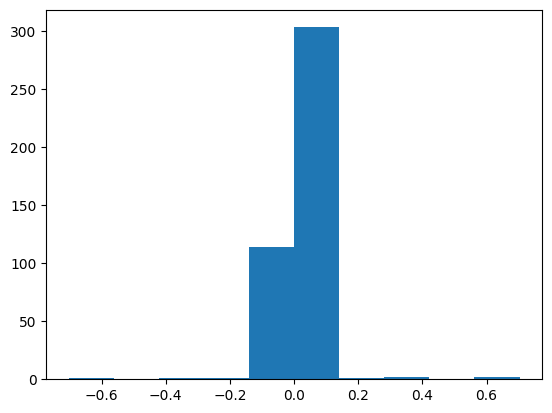

In [115]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.diff(tokens.tops))

print(np.diff(tokens.tops))